In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from phi import math, field
from phi.math import wrap, channel, spatial, instance
from phi.field import SoftGeometryMask, AngularVelocity, Grid, divergence, spatial_gradient, where, CenteredGrid, PointCloud
from phi.geom import union, Geometry

ImportError: cannot import name 'CenteredGrid' from partially initialized module 'phi.field' (most likely due to a circular import) (/Users/marcel/git/PhiFlow/phi/field/__init__.py)

In [3]:
data = math.random_uniform(spatial(x=10, y=10, z=10), channel(vector='x,y,z'))

In [4]:
data

(xˢ=10, yˢ=10, zˢ=10, vectorᶜ=x,y,z) 0.503 ± 0.290 (3e-05...1e+00)

In [5]:
# Extracting an instance from a Tensor
data.native(['x', 'y', 'z', 'vector'])

array([[[[0.4254249 , 0.45919806, 0.9591326 ],
         [0.32374433, 0.8585425 , 0.04971628],
         [0.9202786 , 0.79672027, 0.9890029 ],
         ...,
         [0.8599671 , 0.3286496 , 0.57626307],
         [0.10357234, 0.77478534, 0.31924862],
         [0.3619732 , 0.89294326, 0.11930441]],

        [[0.06041207, 0.30682352, 0.76435274],
         [0.695414  , 0.82507443, 0.10422496],
         [0.6765138 , 0.16482802, 0.7170042 ],
         ...,
         [0.5299192 , 0.54669785, 0.06430988],
         [0.56820655, 0.79208815, 0.59750247],
         [0.78726   , 0.2734776 , 0.9947038 ]],

        [[0.37104213, 0.94117564, 0.48121414],
         [0.48756835, 0.8649911 , 0.7409574 ],
         [0.27083138, 0.8272168 , 0.4740164 ],
         ...,
         [0.696854  , 0.47170344, 0.52053124],
         [0.08879066, 0.20126168, 0.87278885],
         [0.7491208 , 0.08310553, 0.5556203 ]],

        ...,

        [[0.0768082 , 0.966777  , 0.2965328 ],
         [0.86758333, 0.711357  , 0.02549846]

In [6]:
data *= 100

In [7]:
from phi.math._tensors import NativeTensor, TensorDim
vec: TensorDim = data.vector

In [8]:
# Packing the spatial dimensions into a single dimension
math.pack_dims(data, spatial, instance('spatial'))

(spatialⁱ=1000, vectorᶜ=x,y,z) 50.315 ± 28.998 (3e-03...1e+02)

In [9]:
vec['x', 'y', 'z']

(xˢ=10, yˢ=10, zˢ=10, vectorᶜ=x,y,z) 50.315 ± 28.998 (3e-03...1e+02)

In [10]:
from phi.field import CenteredGrid
from phi.geom import Box
lower = math.tensor([0, 0])
cg = CenteredGrid([0, 0], bounds=Box(lower=math.tensor([0, 0]), upper=math.tensor([10, 10])), resolution=10)

AssertionError: vector dimension of lower must list spatial dimension order

In [2]:
%load_ext autoreload
%autoreload 2

(angleˢ=7, tˢ=100, vectorᶜ=x,y) 5.678 ± 4.887 (0e+00...1e+01)
(xˢ=7, yˢ=100, vectorᶜ=x,y) 5.678 ± 4.887 (0e+00...1e+01)


<Figure size 1200x500 with 1 Axes>

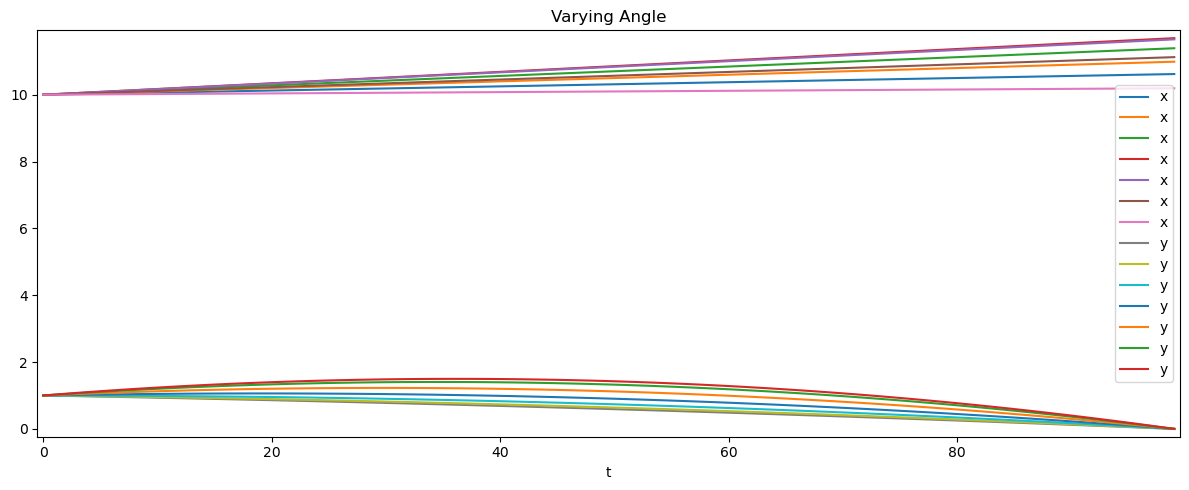

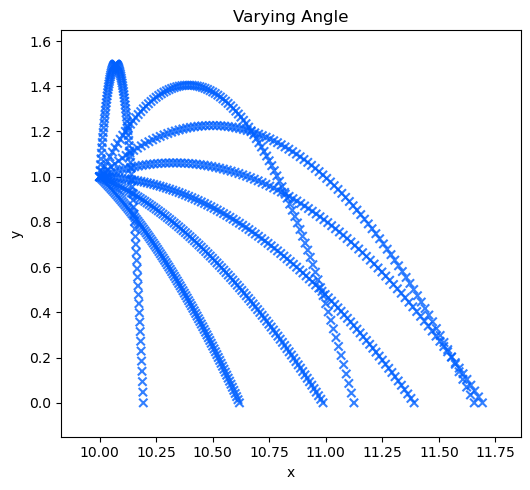

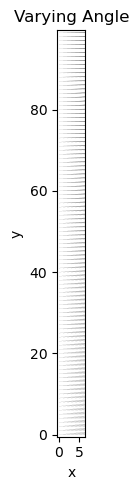

In [11]:
# Question from Linglai
# from phi.tf.flow import *
from phi.torch.flow import *
# from phi.jax.stax.flow import *

def simulate_hit(pos, height, vel, angle, gravity=1.):
    vel_x, vel_y = math.cos(angle) * vel, math.sin(angle) * vel
    height = math.maximum(height, .5)
    hit_time = (vel_y + math.sqrt(vel_y**2 + 2 * gravity * height)) / gravity
    return pos + vel_x * hit_time, hit_time, height, vel_x, vel_y

def sample_trajectory(pos, height, vel, angle, gravity=1.):
    hit, hit_time, height, vel_x, vel_y = simulate_hit(pos, height, vel, angle, gravity)
    t = math.linspace(0, hit_time, spatial(t=100))
    return vec(x=pos + vel_x * t, y=height + vel_y * t - gravity / 2 * t ** 2)

traj = sample_trajectory(tensor(10), 1, 1, math.linspace(-PI/4, 1.5, channel(angle=7)))
# print(traj)
vis.plot(traj, title="Varying Angle")

traj = sample_trajectory(tensor(10), 1, 1, math.linspace(-PI/4, 1.5, instance(angle=7)))
# print(traj)
vis.plot(traj, title="Varying Angle")

traj = sample_trajectory(tensor(10), 1, 1, math.linspace(-PI/4, 1.5, spatial(angle=7)))
print(traj)
traj = math.rename_dims(traj, ['angle', 't'], ['x', 'y'])
print(traj)
vis.plot(traj, title="Varying Angle")

In [21]:
from phi.flow import *

vx = tensor(np.zeros([3, 2]), spatial('x,y'))
vy = tensor(np.zeros([2, 3]), spatial('x,y'))
s = StaggeredGrid(math.stack([vx, vy], channel('vector')), extrapolation.BOUNDARY)
print(s.dimension)
print(f'{s.data=}')
print()
vx = tensor(np.zeros([2, 3]), spatial('x,y'))
vy = tensor(np.zeros([3, 2]), spatial('x,y'))
s = StaggeredGrid(math.stack([vx, vy], channel('vector')), extrapolation.BOUNDARY)
print(s.dimension)
print(f'{s.data=}')
print()
vx = tensor(np.zeros([2, 2]), spatial('x,y'))
vy = tensor(np.zeros([2, 2]), spatial('x,y'))
s = StaggeredGrid(math.stack([vx, vy], channel('vector')), extrapolation.BOUNDARY)
print(s.elements)
print(s)
print(f'{s.data=}')

<bound method Field.dimension of StaggeredGrid[(xˢ=2, yˢ=2, vectorᶜ=2), size=(x=2, y=2) int64, extrapolation=boundary]>
s.data=(xˢ=(3, 2), yˢ=(2, 3), vectorᶜ=2) float64 const 0.0

<bound method Field.dimension of StaggeredGrid[(xˢ=1, yˢ=3, vectorᶜ=2), size=(x=1, y=3) int64, extrapolation=boundary]>
s.data=(xˢ=(2, 3), yˢ=(3, 2), vectorᶜ=2) float64 const 0.0

GeometryStack(xˢ=(x=2, y=1) along staggered_directionᶜ, yˢ=(x=1, y=2) along staggered_directionᶜ, staggered_directionᶜ=x,y, vectorᶜ=x,y)
StaggeredGrid[(xˢ=1, yˢ=1, vectorᶜ=x,y), size=(x=1, y=1) int64, extrapolation=boundary]


AssertionError: Shape.meshgrid() is currently not supported for non-uniform tensors, (xˢ=[94m(x=2, y=1)[0m, yˢ=[94m(x=1, y=2)[0m)

In [22]:
tensor = math.zeros(spatial(x=2, y=2))

In [24]:
print(f'{tensor:color:dtype}')

0.000; 0.000; 0.000; 0.000 (xˢ=2, yˢ=2) float32
